<a href="https://colab.research.google.com/github/Pogayo/Artificial-Intelligence-Class/blob/master/Perez_Ogayo_Assignment1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
from google.colab import files
uploaded=files.upload()

Saving EirGridSystemDemand2014.csv to EirGridSystemDemand2014.csv


In [0]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import io
from datetime import datetime

In [0]:
raw_energy_data=pd.read_csv(io.BytesIO(uploaded['EirGridSystemDemand2014.csv']),parse_dates={"DateTime":['Date','Time']},keep_date_col=True, index_col=0)

In [6]:
raw_energy_data.head(4)

,Date,Time,Demand
DateTime,,,
2014-01-01 00:00:00,1/1/2014,0:00,2899.0
2014-01-01 00:15:00,1/1/2014,0:15,2869.0
2014-01-01 00:30:00,1/1/2014,0:30,2827.0
2014-01-01 00:45:00,1/1/2014,0:45,2787.0


In [7]:
raw_energy_data.dtypes

Date       object
Time       object
Demand    float64
dtype: object

In [8]:
raw_energy_data.describe()

,Demand
count,35036.000000
mean,2943.379381
std,599.643190
min,1665.000000
25%,2426.000000
50%,3014.000000
75%,3378.000000
max,4614.000000


In [0]:
raw_energy_data.shape

(35041, 3)

In [11]:
#Cleaning the data
energy_data=raw_energy_data.copy() #Deep copy to keep the raw independent from the clean data
energy_data['Date']=pd.to_datetime(raw_energy_data['Date'])  #Converting date to datetime formart
energy_data["Time"]=pd.to_datetime(energy_data["Time"]).dt.time #Converting time to datetime formart
energy_data=energy_data.fillna(energy_data["Demand"].mean())  #replacing missing values with 0's
energy_data

,Date,Time,Demand
DateTime,,,
2014-01-01 00:00:00,2014-01-01,00:00:00,2899.0
2014-01-01 00:15:00,2014-01-01,00:15:00,2869.0
2014-01-01 00:30:00,2014-01-01,00:30:00,2827.0
2014-01-01 00:45:00,2014-01-01,00:45:00,2787.0
2014-01-01 01:00:00,2014-01-01,01:00:00,2724.0
...,...,...,...
2014-12-31 23:00:00,2014-12-31,23:00:00,2876.0
2014-12-31 23:15:00,2014-12-31,23:15:00,2961.0
2014-12-31 23:30:00,2014-12-31,23:30:00,2957.0


In [12]:
energy_data.describe()

,Demand
count,35041.000000
mean,2943.379381
std,599.600406
min,1665.000000
25%,2426.000000
50%,3014.000000
75%,3378.000000
max,4614.000000


Text(0, 0.5, 'Energy Demand')

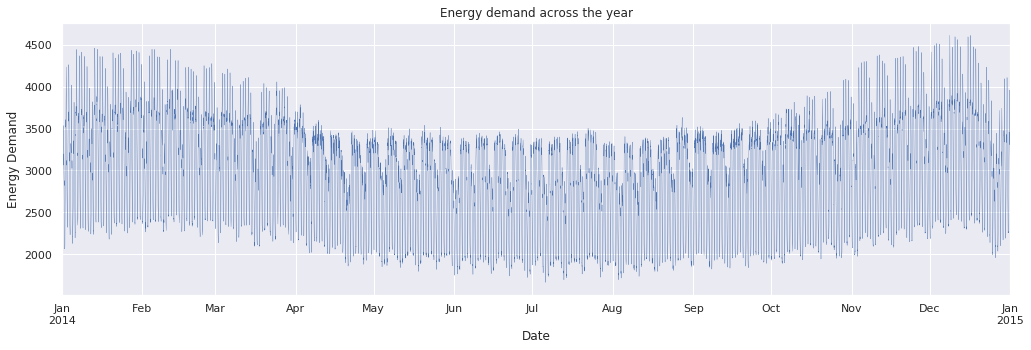

In [15]:
sns.set(rc={'figure.figsize':(17, 5)})
line_fig1=energy_data['Demand'].plot(linewidth=0.3)
line_fig1.set_xlabel("Date")
line_fig1.set_title("Energy demand across the year")
line_fig1.set_ylabel("Energy Demand")

Text(0, 0.5, 'Energy Demand')

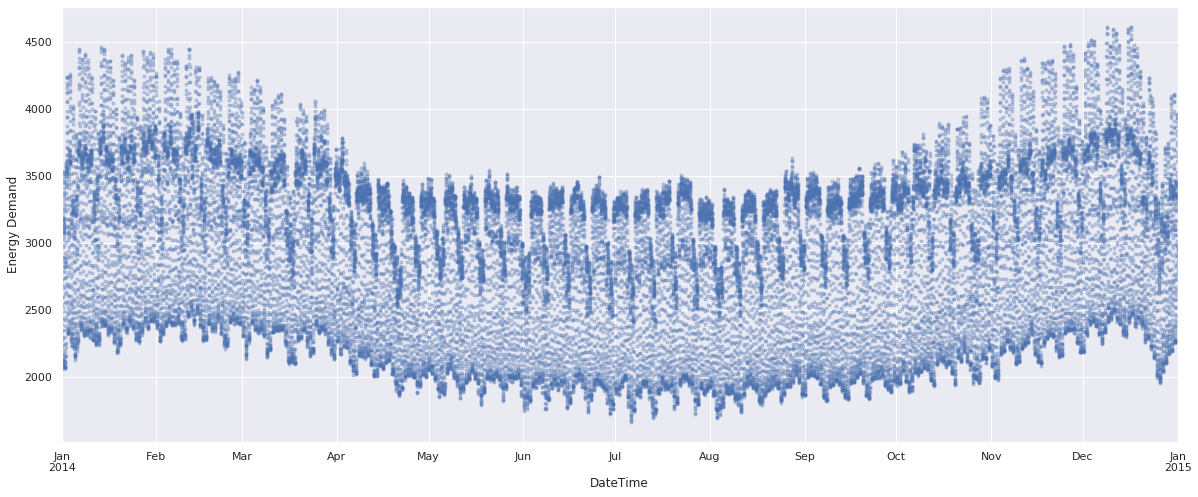

In [17]:
 dot_fig1= energy_data["Demand"].plot(marker='.', alpha=0.3, linestyle='None', figsize=(20, 8))
dot_fig1.set_ylabel('Energy Demand')

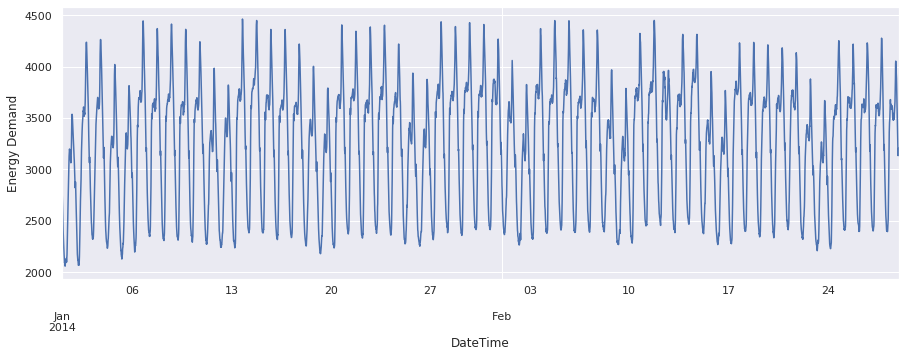

In [0]:
#The month of January
ax = energy_data.loc['2014-01':'2014-02', 'Demand'].plot(figsize=(15, 5))
ax.set_ylabel('Energy Demand');

Text(0.5, 1.0, 'Box plot for energy demand')

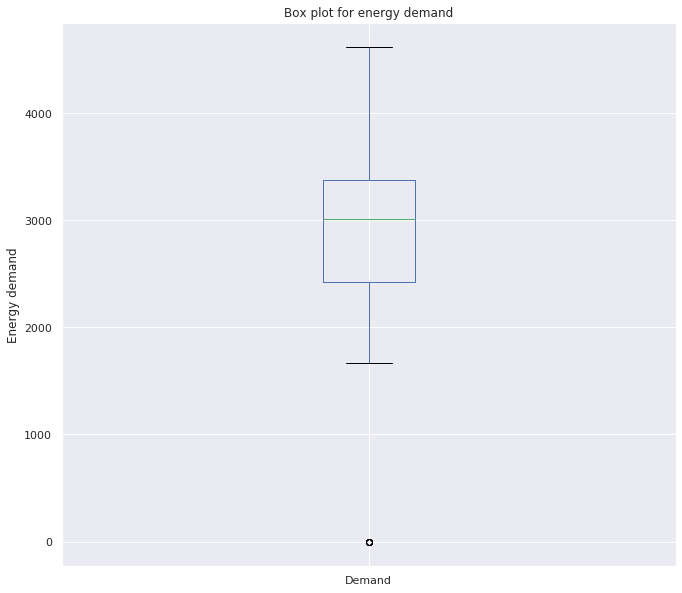

In [0]:
# ax = plt.plot(figsize=(11, 10))
ax= energy_data.boxplot(column="Demand",figsize=(11, 10))
ax.set_ylabel('Energy demand')
ax.set_title("Box plot for energy demand")


Text(0.5, 1.0, 'Demand across the year')

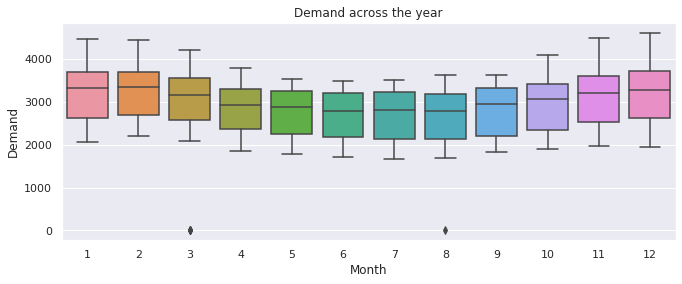

In [0]:
#Investigating the sasonality of the data
energy_data["Month"]=energy_data.index.month
energy_data["WeekdayName"]=energy_data.index.weekday_name
ax=sns.boxplot(data=energy_data, x='Month', y="Demand")
ax.set_ylabel('Demand')
ax.set_title("Demand across the year")

Text(0.5, 1.0, 'Demand across the week')

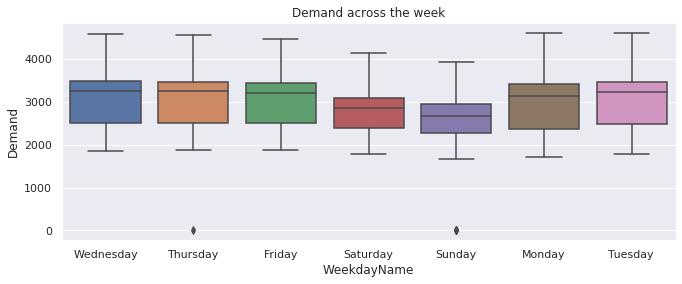

In [0]:
ax=sns.boxplot(data=energy_data, x='WeekdayName', y="Demand")
ax.set_ylabel('Demand')
ax.set_title("Demand across the week")

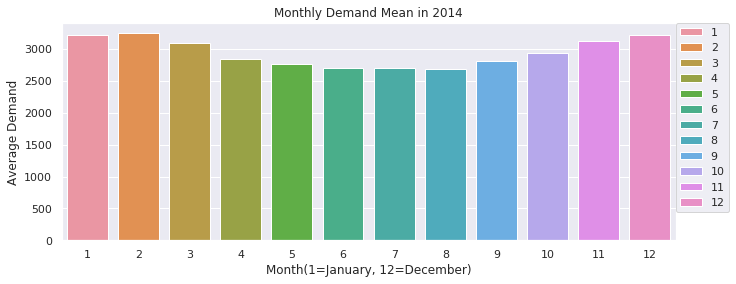

In [0]:
monthly_mean=energy_data.groupby("Month").mean()
monthly_mean.reset_index(inplace=True)
ax=sns.barplot(data=monthly_mean, y="Demand",x="Month", hue="Month",dodge=False)
ax.set_ylabel("Average Demand")
ax.set_xlabel("Month(1=January, 12=December)")
ax.set_title("Monthly Energy Demand Mean in 2014")
plt.legend(bbox_to_anchor=(1, 1), loc=2, borderaxespad=0.) #placing the legend in the top right hand corner

Text(0.5, 1.0, 'Hourly Demand Mean in 2014')

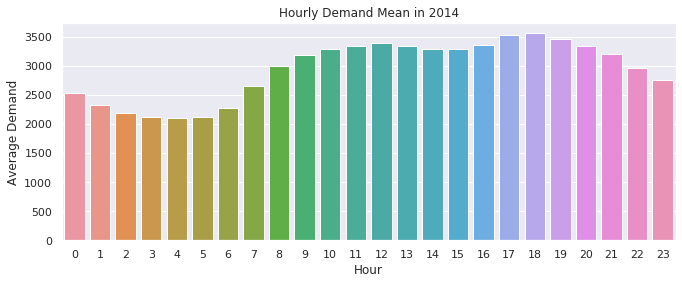

In [0]:
energy_data['Hour']=energy_data.index.hour
hourly_mean=energy_data.groupby('Hour').mean()
hourly_mean.reset_index(inplace=True)
ax=sns.barplot(data=hourly_mean, y="Demand",x="Hour",dodge=False)
ax.set_ylabel("Average Demand")
ax.set_xlabel("Hour")
ax.set_title("Hourly Energy Demand Mean in 2014")

##References
1. [Python Datetime Tutorial: Manipulate Times, Dates, and Time Spans](https://www.dataquest.io/blog/tutorial-time-series-analysis-with-pandas/)
2. [Seaborn Documentation](https://seaborn.pydata.org/)
3. [Matplotlib Documentation](https://matplotlib.org/)
4. [Pandas Documentation](https://pandas.pydata.org/)
5. [Time Series Analisys Tutorial](https://www.datacamp.com/community/tutorials/time-series-analysis-tutorial)